<a href="https://colab.research.google.com/github/AmanCSE-1/Loan-Defaulter-Prediction-based-on-Customer-Behavior/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<em><b>Objective :</b> A Financial organization wants to predict the possible defaulters for the consumer loans product. They have data about historic customer behavior based on what they have observed. Hence when they acquire new customers they want to predict who is riskier and who is not.</em>

# Importing Libraries and Loading Dataset

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df =  pd.read_csv('/Dataset.csv')

In [19]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3.0,13.0,0.0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9.0,13.0,0.0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4.0,10.0,0.0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2.0,12.0,1.0
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3.0,14.0,1.0


In [20]:
df.shape

(53031, 13)

In [21]:
df.drop(columns=['Id'], inplace=True)

In [6]:
df.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [7]:
df.rename(columns={'CITY':'City',
                   'STATE': 'State', 
                   'Married/Single': 'Marital Status',
                   'CURRENT_HOUSE_YRS': 'Current_House_Years',
                   'CURRENT_JOB_YRS': 'Current_Job_Years'}, inplace=True)

df.columns

Index(['Income', 'Age', 'Experience', 'Marital Status', 'House_Ownership',
       'Car_Ownership', 'Profession', 'City', 'State', 'Current_Job_Years',
       'Current_House_Years', 'Risk_Flag'],
      dtype='object')

## Descriptive Statistics

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53031 entries, 0 to 53030
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               53031 non-null  int64  
 1   Age                  53031 non-null  int64  
 2   Experience           53031 non-null  int64  
 3   Marital Status       53031 non-null  object 
 4   House_Ownership      53031 non-null  object 
 5   Car_Ownership        53031 non-null  object 
 6   Profession           53031 non-null  object 
 7   City                 53030 non-null  object 
 8   State                53030 non-null  object 
 9   Current_Job_Years    53030 non-null  float64
 10  Current_House_Years  53030 non-null  float64
 11  Risk_Flag            53030 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 4.9+ MB


In [9]:
df.describe()

,Income,Age,Experience,Current_Job_Years,Current_House_Years,Risk_Flag
count,5.303100e+04,53031.000000,53031.000000,53030.000000,53030.000000,53030.000000
mean,5.007864e+06,49.998058,10.110992,6.341656,11.992174,0.138016
std,2.876954e+06,17.053206,5.999753,3.645691,1.394689,0.344920
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.517585e+06,35.000000,5.000000,4.000000,11.000000,0.000000
50%,5.017077e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.488205e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999180e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [10]:
df.isna().sum()

Income                 0
Age                    0
Experience             0
Marital Status         0
House_Ownership        0
Car_Ownership          0
Profession             0
City                   1
State                  1
Current_Job_Years      1
Current_House_Years    1
Risk_Flag              1
dtype: int64

# Exploratory Data Analysis

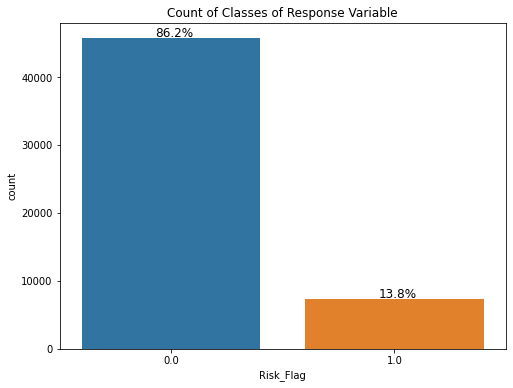

In [15]:
plt.figure(figsize=(8, 6))
risk_plot = sns.countplot(x=df['Risk_Flag'], data=df)
plt.title('Count of Classes of Response Variable')

for p in risk_plot.patches:
    txt = str(round(p.get_height()/df.shape[0]*100, 2)) + '%'
    txt_x = p.get_x() + p.get_width()/2 -0.07
    txt_y = p.get_height() + 200
    risk_plot.text(txt_x, txt_y, txt, size=12)
    
plt.show()

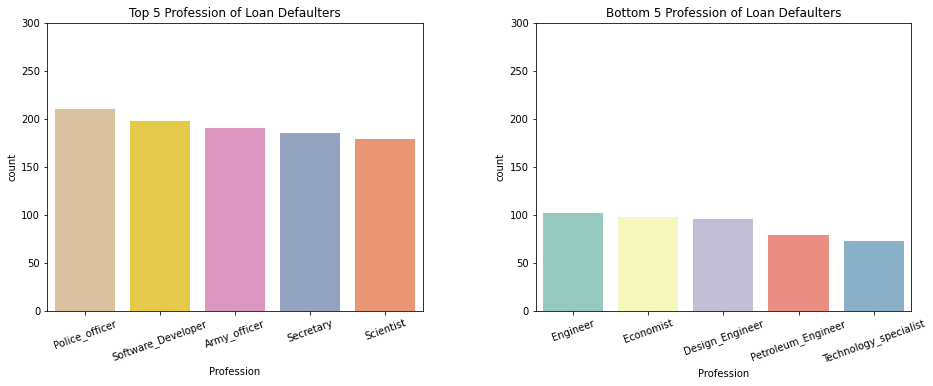

In [22]:
plt.subplots_adjust(left=0, right=2, bottom=0, top=1, wspace=0.3, hspace=0.1)

plt.subplot(1,2,1)
sns.countplot(data=df[df['Risk_Flag']==1], x='Profession', palette='Set2_r', 
              order=pd.value_counts(df[df['Risk_Flag']==1]['Profession']).iloc[:5].index)
plt.ylim([0,300])
plt.xticks(rotation=20)
plt.title('Top 5 Profession of Loan Defaulters')


plt.subplot(1,2,2)
sns.countplot(data=df[df['Risk_Flag']==1], x='Profession', palette='Set3', 
              order=pd.value_counts(df[df['Risk_Flag']==1]['Profession']).iloc[-5:].index)
plt.ylim([0,300])
plt.xticks(rotation=20)
plt.title('Bottom 5 Profession of Loan Defaulters')

plt.show()

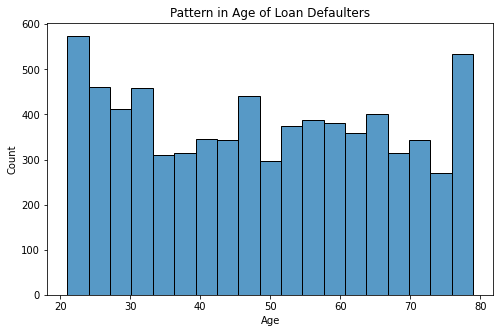

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df[df['Risk_Flag']==1], x='Age')
plt.title('Pattern in Age of Loan Defaulters')
plt.show()

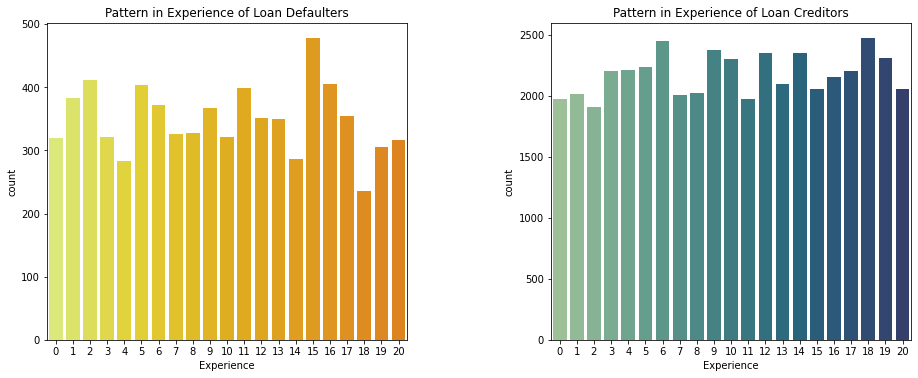

In [24]:
plt.subplots_adjust(left=0, right=2, bottom=0, top=1.1, wspace=0.4, hspace=0.2)

plt.subplot(1,2,1)
sns.countplot(data=df[df['Risk_Flag']==1], x='Experience', palette='Wistia')
plt.title('Pattern in Experience of Loan Defaulters')

plt.subplot(1,2,2)
sns.countplot(data=df[df['Risk_Flag']==0], x='Experience', palette='crest')
plt.title('Pattern in Experience of Loan Creditors')
plt.show()